In [1]:
#import random
#import sys
#import io
#import os
#import glob
#import IPython

# Show graphs inline, as part of the notebook
%matplotlib inline

# Show graphs in a separate window
#%matplotlib osx
#%matplotlib qt  # wx, gtk, osx, tk
#%matplotlib # empty uses default

import sys
import time

# http://www.numpy.org
import numpy as np

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html
import matplotlib.pyplot as pp

# Multidimensional matrix multiplications
import tensorflow as tf

# Convenient API for describing neural networks
import keras as k
from keras.utils import np_utils

# Reading/writing datasets from/to file 
import h5py

# http://pydub.com
# https://github.com/jiaaro/pydub
from pydub import AudioSegment
from pydub.playback import play

# local library of helpful functions
import library as lib
from importlib import reload
library = reload(lib)

AhemPreventor library load success.
AhemPreventor library load success.


Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pydub\utils.py:184: RuntimeWarning: Couldn't find ffplay or avplay - defaulting to ffplay, but may not work
  warn("Couldn't find ffplay or avplay - defaulting to ffplay, but may not work", RuntimeWarning)


In [2]:
filename = "AudioData/Uebung-02-reencoded.wav"
a = library.load_audio(filename)
print(a)

In [3]:
modelName = "model-2layerGRU.h5"

model = tf.keras.models.load_model("models/"+modelName, 
        custom_objects={'false_positive_rate': library.false_positive_rate, 
                        'true_positive_rate': library.true_positive_rate})

## Classify Audio Data

In [5]:
predictions = [] # list of predictions (float numbers between 0 and 1)
start = 5 * 60 * 1000 # start at a certain minute in the audio data
end = start + 60 * 1000 # duration is 1 minute
timestamps = range(start, end, 100) # move window in steps of 100 ms
for time in timestamps:
    sampleData = library.getSample(a, time)
    if sampleData is None:
        predictions.append(0)
        continue
    
    features = lib.compute_mfcc(sampleData)
    #print(type(features), features)
    #print("sample shape is ", features.shape)
    
    if 0: # for CNNs
        features = features.reshape(1, features.shape[0], features.shape[1], 1)
    else: # for RNNs
        pass
        #s = np.swapaxes(s, 0, 1)
        features = features.reshape(1, features.shape[0], features.shape[1])
    result = model.predict(features)[0,0]
    print("result at time ", time/1000, "s is %.2f" % result)
    predictions.append(result)

predictions = np.array(predictions)
#print(predictions)

result at time  300.0 s is 0.01
result at time  300.1 s is 0.00
result at time  300.2 s is 0.00
result at time  300.3 s is 0.00
result at time  300.4 s is 0.00
result at time  300.5 s is 0.00
result at time  300.6 s is 0.00
result at time  300.7 s is 0.00
result at time  300.8 s is 0.00
result at time  300.9 s is 0.00
result at time  301.0 s is 0.00
result at time  301.1 s is 0.00
result at time  301.2 s is 0.00
result at time  301.3 s is 0.03
result at time  301.4 s is 0.00
result at time  301.5 s is 0.00
result at time  301.6 s is 0.00
result at time  301.7 s is 0.00
result at time  301.8 s is 0.00
result at time  301.9 s is 0.00
result at time  302.0 s is 0.00
result at time  302.1 s is 0.00
result at time  302.2 s is 0.00
result at time  302.3 s is 0.00
result at time  302.4 s is 0.00
result at time  302.5 s is 0.00
result at time  302.6 s is 0.00
result at time  302.7 s is 0.00
result at time  302.8 s is 0.16
result at time  302.9 s is 0.00
result at time  303.0 s is 0.00
result a

result at time  325.9 s is 0.00
result at time  326.0 s is 0.00
result at time  326.1 s is 0.00
result at time  326.2 s is 0.00
result at time  326.3 s is 0.00
result at time  326.4 s is 0.00
result at time  326.5 s is 0.00
result at time  326.6 s is 0.00
result at time  326.7 s is 0.00
result at time  326.8 s is 0.00
result at time  326.9 s is 0.00
result at time  327.0 s is 0.00
result at time  327.1 s is 0.00
result at time  327.2 s is 0.00
result at time  327.3 s is 0.00
result at time  327.4 s is 0.00
result at time  327.5 s is 0.00
result at time  327.6 s is 0.00
result at time  327.7 s is 0.00
result at time  327.8 s is 0.48
result at time  327.9 s is 0.18
result at time  328.0 s is 0.00
result at time  328.1 s is 0.00
result at time  328.2 s is 0.00
result at time  328.3 s is 0.00
result at time  328.4 s is 0.00
result at time  328.5 s is 0.00
result at time  328.6 s is 0.01
result at time  328.7 s is 0.00
result at time  328.8 s is 0.00
result at time  328.9 s is 0.00
result a

result at time  351.8 s is 0.27
result at time  351.9 s is 0.00
result at time  352.0 s is 0.00
result at time  352.1 s is 0.00
result at time  352.2 s is 0.00
result at time  352.3 s is 0.00
result at time  352.4 s is 0.00
result at time  352.5 s is 0.00
result at time  352.6 s is 0.00
result at time  352.7 s is 0.00
result at time  352.8 s is 0.00
result at time  352.9 s is 0.00
result at time  353.0 s is 0.00
result at time  353.1 s is 0.00
result at time  353.2 s is 0.00
result at time  353.3 s is 0.10
result at time  353.4 s is 0.01
result at time  353.5 s is 0.06
result at time  353.6 s is 0.03
result at time  353.7 s is 0.00
result at time  353.8 s is 0.00
result at time  353.9 s is 0.00
result at time  354.0 s is 0.00
result at time  354.1 s is 0.00
result at time  354.2 s is 0.00
result at time  354.3 s is 0.00
result at time  354.4 s is 0.00
result at time  354.5 s is 0.00
result at time  354.6 s is 0.00
result at time  354.7 s is 0.00
result at time  354.8 s is 0.00
result a

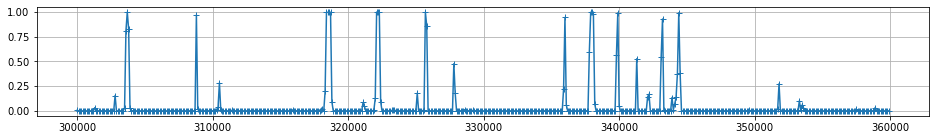

In [6]:
# predictions of the analyzed audio data
pp.figure(figsize=(16,2))
pp.plot(timestamps, predictions, '+-')
pp.grid()

In [ ]:
# playback the identified positives as an overlay over the audio data
sampleAudio = a[start : end]
pling = AudioSegment.from_file("ding.wav")
pling = pling.set_frame_rate(16000)
print("Successfully loaded ding.wav")

for i in range(len(predictions)):
    if np.sum(predictions[i:i+1]) >= 0.8:
        timestamp = i * 100
        print(timestamp, predictions[i])
        sampleAudio = sampleAudio.overlay(pling, position=timestamp)

play(sampleAudio)
#sampleAudio.export("test.wav", format='wav')
print("Done.")

Successfully loaded ding.wav
3600 0.8105005
3700 0.99919206
3800 0.82387555
8800 0.97029096
18400 0.9949485
18500 0.99700934
18600 0.99949455
18700 0.9973858
22100 0.9985928
22200 0.9996853
22300 0.99746203
25700 0.9980609
25800 0.85866743
36000 0.94470316
37900 0.9968508
38000 0.9990676
38100 0.9762164
39900 0.9907831
43200 0.9291461
44400 0.9921928
